# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Change current working directory to project folder (1 mark)

In [0]:
import os
#### Added code here ####
os.chdir('/content/drive/My Drive/GreatLearning/myprojects/Residency10/')

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
data = np.load('images.npy',allow_pickle=True)#### Added code here ####

### Check one sample from the loaded "images.npy" file  (2 marks)

In [0]:
#### Added coded in below cells ####

In [114]:
print('Dimension of numpy array: ', data.ndim)
print('Size of numpy array: ', data.size)
print('Shape of numpy array: ', data.shape)
print('Length or size of first dimension of numpy array: ', len(data))

Dimension of numpy array:  2
Size of numpy array:  818
Shape of numpy array:  (409, 2)
Length or size of first dimension of numpy array:  409


In [115]:
data[0]

array([array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8),
       list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 

In [116]:
print('type of first element:', type(data[4][0]))
print('Dimension of numpy ndarray array: ', data[4][0].ndim)
print('Size of numpy ndarray: ', data[4][0].size)
print('Shape of numpy ndarray: ', data[4][0].shape)
print('Length or size of first dimension of numpy ndarray: ', len(data[4][0]))
data[4][0]

type of first element: <class 'numpy.ndarray'>
Dimension of numpy ndarray array:  3
Size of numpy ndarray:  567240
Shape of numpy ndarray:  (326, 580, 3)
Length or size of first dimension of numpy ndarray:  326


array([[[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [190, 201, 107],
        [193, 204, 110],
        [193, 204, 108]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [191, 203, 105],
        [192, 204, 106],
        [193, 205, 105]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [187, 200,  94],
        [184, 197,  91],
        [185, 198,  90]],

       ...,

       [[191, 191, 203],
        [170, 170, 182],
        [167, 167, 177],
        ...,
        [ 24,  41,  71],
        [ 14,  33,  66],
        [  7,  27,  64]],

       [[190, 190, 202],
        [172, 172, 184],
        [170, 170, 182],
        ...,
        [ 33,  50,  80],
        [ 17,  36,  69],
        [  5,  25,  62]],

       [[189, 191, 204],
        [172, 174, 187],
        [169, 171, 183],
        ...,
        [ 44,  63,  95],
        [ 28,  48,  83],
        [ 14,  36,  75]]

In [117]:
print('type of second element:', type(data[4][1]))
print('length of second element:', len(data[4][1]))
data[4][1]

type of second element: <class 'list'>
length of second element: 6


[{'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.5586206896551724, 'y': 0.19938650306748465},
   {'x': 0.6603448275862069, 'y': 0.3773006134969325}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.38620689655172413, 'y': 0.18711656441717792},
   {'x': 0.4896551724137931, 'y': 0.4049079754601227}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.1724137931034483, 'y': 0.23006134969325154},
   {'x': 0.2775862068965517, 'y': 0.44171779141104295}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7155172413793104, 'y': 0.19938650306748465},
   {'x': 0.8448275862068966, 'y': 0.41411042944785276}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.2982758620689655, 'y': 0.44171779141104295},
   {'x': 0.4189655172413793, 'y': 0.65337423

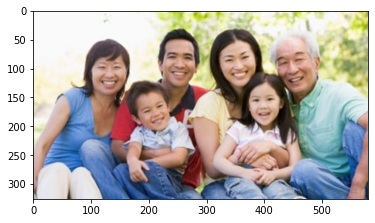

In [118]:
from matplotlib import pyplot as plt
plt.imshow(data[4][0])

Summary of findings:

images.npy has array of 409 ndarray (images) and list (details of bounding boxes).

first element is ndarray is (333,650,3) and second element is list of dictionaries having bounding boxes details with image height,width,label,notes and points indicating bounding boxes for faces.

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224 #### Added code here ####
IMAGE_HEIGHT = 224 #### Added code here ####

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [121]:
#### Added code here ####
print('Shape of X_train: ',X_train.shape)

Shape of X_train:  (409, 224, 224, 3)


In [122]:
#### Added code here ####
print('Shape of mask: ',masks.shape)

Shape of mask:  (409, 224, 224)


### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.96078432  0.96078432  0.96078432]
  [ 0.96078432  0.96078432  0.96078432]
  [ 0.96078432  0.96078432  0.96078432]
  ...
  [ 0.59215689  0.68627453 -0.08235294]
  [ 0.49019611  0.57647061 -0.17647058]
  [ 0.51372552  0.60784316 -0.13725489]]

 [[ 0.96078432  0.96078432  0.96078432]
  [ 0.96078432  0.96078432  0.96078432]
  [ 0.96078432  0.96078432  0.96078432]
  ...
  [ 0.66274512  0.74117649 -0.01960784]
  [ 0.54509807  0.64705884 -0.13725489]
  [ 0.47450984  0.56862748 -0.23921567]]

 [[ 0.96078432  0.96078432  0.96078432]
  [ 0.96078432  0.96078432  0.96078432]
  [ 0.96078432  0.96078432  0.96078432]
  ...
  [ 0.7647059   0.82745099  0.05098045]
  [ 0.58431375  0.67058825 -0.17647058]
  [ 0.34901965  0.45098042 -0.48235291]]

 ...

 [[ 0.34901965  0.34901965  0.41960788]
  [ 0.52941179  0.52941179  0.60784316]
  [ 0.28627455  0.28627455  0.34901965]
  ...
  [ 0.14509809 -0.10588235 -0.09803921]
  [-0.69411767 -0.62352943 -0.4588235 ]
  [-0.89019608 -0.74117649 -0.46666664]]

 [

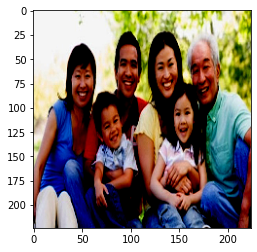

In [123]:
from matplotlib import pyplot
n = 4
print(X_train[n])
pyplot.imshow(X_train[n])

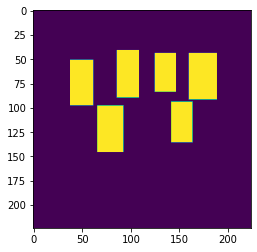

In [124]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights='imagenet') #### Added code here ####
    for layer in model.layers:
        layer.trainable = trainable

    # Added all the UNET layers here
    #### Added code here below ####
    block1 = model.get_layer("conv_pw_1_relu").output
    block2 = model.get_layer("conv_pw_3_relu").output
    block3 = model.get_layer("conv_pw_5_relu").output
    block4 = model.get_layer("conv_pw_11_relu").output
    block5 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block5), block4])
    x = Concatenate()([UpSampling2D()(x), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = UpSampling2D()(x)

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_WIDTH,IMAGE_HEIGHT))(x)

    return Model(inputs=model.input, outputs=x)#### Added code here ####

Convolutional Network (with pooling layers and dense layers) would reduce the size of mask and would therefore improve on receptive field 'what' information but loses the object location information.

Output of the model for semantic segmentation will require output (mask) size same as image to capture object location or 'where' information along with receptive field or  'what' information.

Different techniques can be used to upsample like bi-linear interpolation,cubic interpolation, nearest-neighbor interpolation, unpooling, trasposed convolution.By default, Keras Upsampling2D function uses nearest neighbor interpolation.

So, Upsampling is added above to match the size of output to the size of masks (224 by 224) here.

### Call the create_model function

In [126]:
import tensorflow as tf
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
tf.keras.backend.clear_session()
model = create_model(False)

# Print summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
______________________________________________________________________________________________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
def dice_coefficient(y_true, y_pred):
    #### Added code here ####
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon()) #### Added code here ####

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
#### Added code here ####
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [130]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=10)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [131]:
#### Added code here ####
EPOCHS = 150
model_fit = model.fit(X_train,masks,epochs=EPOCHS,
                    callbacks=[checkpoint, reduce_lr, stop],
                    batch_size=1)

Epoch 1/150
409/409 [==============================] - 19s 48ms/step - loss: 2.0825 - dice_coefficient: 0.2550 - lr: 1.0000e-04
Epoch 2/150
409/409 [==============================] - 19s 47ms/step - loss: 1.3082 - dice_coefficient: 0.4081 - lr: 1.0000e-04
Epoch 3/150
409/409 [==============================] - 19s 47ms/step - loss: 1.1076 - dice_coefficient: 0.4743 - lr: 1.0000e-04
Epoch 4/150
409/409 [==============================] - 19s 48ms/step - loss: 1.0128 - dice_coefficient: 0.5097 - lr: 1.0000e-04
Epoch 5/150
409/409 [==============================] - 19s 47ms/step - loss: 0.9608 - dice_coefficient: 0.5313 - lr: 1.0000e-04
Epoch 6/150
409/409 [==============================] - 19s 48ms/step - loss: 0.9242 - dice_coefficient: 0.5459 - lr: 1.0000e-04
Epoch 7/150
409/409 [==============================] - 19s 47ms/step - loss: 0.8966 - dice_coefficient: 0.5572 - lr: 1.0000e-04
Epoch 8/150
409/409 [==============================] - 19s 47ms/step - loss: 0.8782 - dice_coefficient: 

### Get the predicted mask for a sample image   (3 marks)

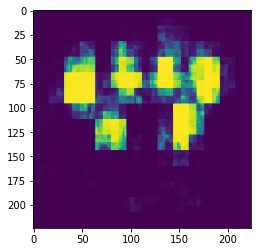

In [132]:
n = 4
sample_image = X_train[n]

#### Added code here ####
sample_image4d = np.expand_dims(sample_image,axis=0)
mask = model.predict(sample_image4d)
mask = np.reshape(mask, (224,224))
plt.imshow(mask)

### Impose the mask on the image (3 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


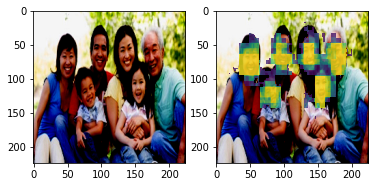

In [133]:
#### Added code here ####
masked = np.ma.masked_where(mask < 0.1, mask)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(sample_image)
plt.subplot(1,2,2)
plt.imshow(sample_image)
plt.imshow(masked, alpha=0.8)
plt.show()

Some additional model training history visualizations

In [134]:
# list all data in history
print(model_fit.history.keys())

dict_keys(['loss', 'dice_coefficient', 'lr'])


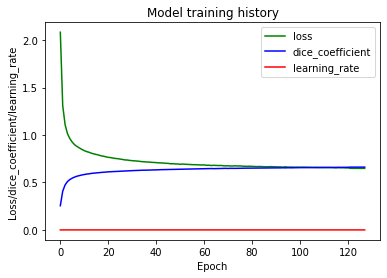

In [135]:
# Summary - History for loss

plt.plot(model_fit.history['loss'], color = 'green')
plt.plot(model_fit.history['dice_coefficient'], color = 'blue')
plt.plot(model_fit.history['lr'], color = 'red')
plt.title('Model training history')
plt.ylabel('Loss/dice_coefficient/learning_rate')
plt.xlabel('Epoch')
plt.legend(['loss', 'dice_coefficient', 'learning_rate'], loc='upper right')
plt.show();